In [80]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [81]:
features = pd.read_csv('tmp/features.csv')
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403900 entries, 0 to 403899
Data columns (total 10 columns):
file                403900 non-null object
title_chars         403900 non-null int64
title_words         403900 non-null int64
links               403900 non-null int64
images              403900 non-null int64
paragraphs          403900 non-null int64
chars               403900 non-null int64
words               403900 non-null int64
links_per_words     403900 non-null float64
images_per_words    403900 non-null float64
dtypes: float64(2), int64(7), object(1)
memory usage: 33.9+ MB


In [82]:
features[:3]

,file,title_chars,title_words,links,images,paragraphs,chars,words,links_per_words,images_per_words
0,2580582_raw_html.txt,64,7,701,701,4677,9353,5430,0.129098,0.129098
1,3099576_raw_html.txt,92,15,108,108,904,1807,1037,0.104147,0.104147
2,2095794_raw_html.txt,125,19,186,186,4123,8245,4863,0.038248,0.038248


In [83]:
train = pd.read_csv('input/train_v2.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337024 entries, 0 to 337023
Data columns (total 2 columns):
file         337024 non-null object
sponsored    337024 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.7+ MB


In [84]:
train[:3]

,file,sponsored
0,3093804_raw_html.txt,0
1,845185_raw_html.txt,0
2,3370996_raw_html.txt,0


In [85]:
train.sponsored.value_counts()

0    304345
1     32679
dtype: int64

In [86]:
test = pd.read_csv('input/sampleSubmission_v2.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66772 entries, 0 to 66771
Data columns (total 2 columns):
file         66772 non-null object
sponsored    66772 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [87]:
test[:3]

,file,sponsored
0,119_raw_html.txt,0
1,167_raw_html.txt,0
2,329_raw_html.txt,0


In [88]:
features.describe()

,title_chars,title_words,links,images,paragraphs,chars,words,links_per_words,images_per_words
count,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000
mean,1238.151235,599.099943,138.156368,138.156368,8150.122941,16299.368183,10888.288448,0.235640,0.235640
std,21144.288559,10536.847026,305.508596,305.508596,45538.265065,91076.508241,63126.787694,1.828691,1.828691
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35.000000,6.000000,46.000000,46.000000,282.000000,563.000000,327.000000,0.009367,0.009367
50%,52.000000,9.000000,96.000000,96.000000,1726.000000,3451.000000,2015.000000,0.032551,0.032551
75%,68.000000,12.000000,166.000000,166.000000,4608.000000,9215.000000,5394.000000,0.098460,0.098460
max,5770810.000000,2883838.000000,113886.000000,113886.000000,8894739.000000,17789477.000000,10278377.000000,660.187500,660.187500


In [89]:
tc_q995 = features.title_chars.quantile(0.995)
features.loc[features.title_chars > tc_q995, 'title_chars'] = tc_q995

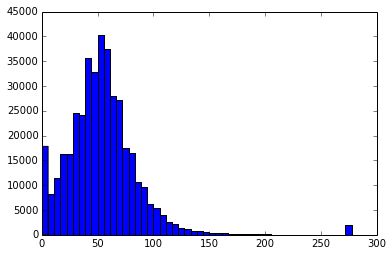

In [90]:
_ = plt.hist(features.title_chars, bins = 50)

In [91]:
tw_q995 = features.title_words.quantile(0.995)
features.loc[features.title_words > tw_q995, 'title_words'] = tw_q995

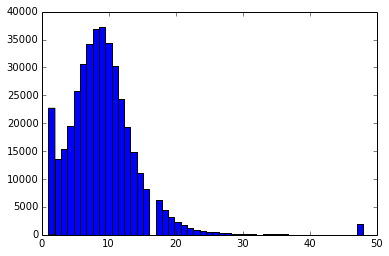

In [92]:
_ = plt.hist(features.title_words, bins = 50)

In [93]:
l_q995 = features.links.quantile(0.995)
features.loc[features.links > l_q995, 'links'] = l_q995

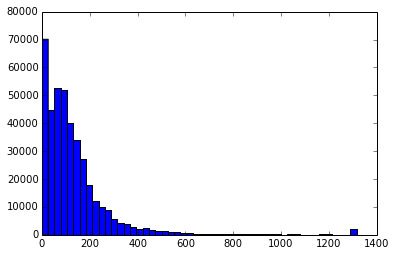

In [94]:
_ = plt.hist(features.links, bins = 50)

In [95]:
i_q995 = features.images.quantile(0.995)
features.loc[features.images > i_q995, 'images'] = i_q995

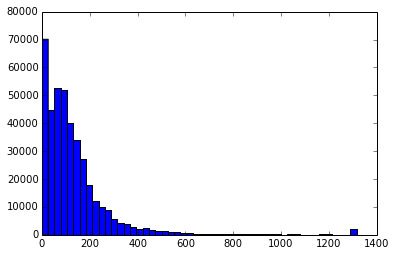

In [96]:
_ = plt.hist(features.images, bins = 50)

In [97]:
p_q95 = features.paragraphs.quantile(0.95)
features.loc[features.paragraphs > p_q95, 'paragraphs'] = p_q95

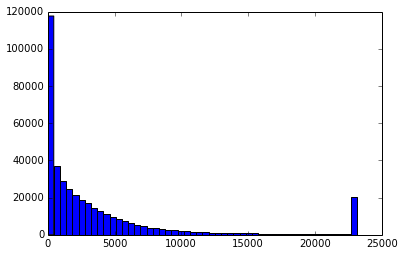

In [98]:
_ = plt.hist(features.paragraphs, bins = 50)

In [99]:
c_q95 = features.chars.quantile(0.95)
features.loc[features.chars > c_q95, 'chars'] = c_q95

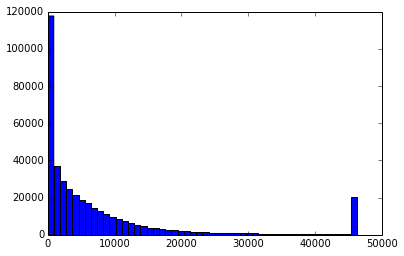

In [100]:
_ = plt.hist(features.chars, bins = 50)

In [101]:
w_q95 = features.words.quantile(0.95)
features.loc[features.words > w_q95, 'words'] = w_q95

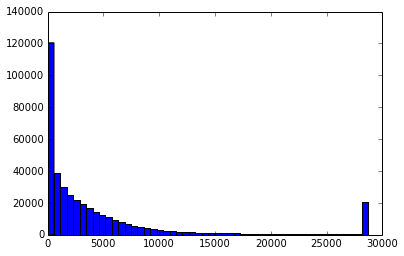

In [102]:
_ = plt.hist(features.words, bins = 50)

In [103]:
lpw_q95 = features.links_per_words.quantile(0.95)
features.loc[features.links_per_words > lpw_q95, 'links_per_words'] = lpw_q95

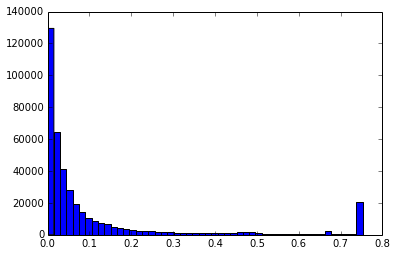

In [104]:
_ = plt.hist(features.links_per_words, bins = 50)

In [105]:
ipw_q95 = features.images_per_words.quantile(0.95)
features.loc[features.images_per_words > ipw_q95, 'images_per_words'] = ipw_q95

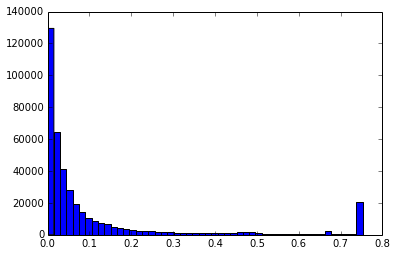

In [106]:
_ = plt.hist(features.images_per_words, bins = 50)

In [107]:
features.describe()

,title_chars,title_words,links,images,paragraphs,chars,words,links_per_words,images_per_words
count,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000,403900.000000
mean,53.876026,9.044088,132.349879,132.349879,3901.964929,7803.052158,4682.334879,0.111038,0.111038
std,32.377302,5.509125,156.358320,156.358320,5758.322298,11516.561726,7094.850916,0.192785,0.192785
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35.000000,6.000000,46.000000,46.000000,282.000000,563.000000,327.000000,0.009367,0.009367
50%,52.000000,9.000000,96.000000,96.000000,1726.000000,3451.000000,2015.000000,0.032551,0.032551
75%,68.000000,12.000000,166.000000,166.000000,4608.000000,9215.000000,5394.000000,0.098460,0.098460
max,277.505000,48.000000,1316.505000,1316.505000,23120.250000,46239.500000,28756.050000,0.752579,0.752579


In [108]:
features.to_csv('tmp/features_clean.csv', index=False)